In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the dataset

In [3]:
responses = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv',low_memory=False)

In [4]:
responses.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


There are two types of questions as part of this survey:

1. Select one from the all given options.
2. select more than one from given options.

Now lets looks at the example of each category. 




# Understanding Data 

### Type-1 : Select one from all the given options
   
For eg. Q2. What is your age (# years)? 

Now your age cannot be in multiple ranges it will always belong to a single range hence you can select one from the given options in these types of questions. 

In [5]:
responses['Q2'].value_counts(normalize=True)

18-21                          0.189974
25-29                          0.186349
22-24                          0.178473
30-34                          0.123844
35-39                          0.098050
40-44                          0.080298
45-49                          0.052213
50-54                          0.038087
55-59                          0.025460
60-69                          0.021918
70+                            0.005292
What is your age (# years)?    0.000042
Name: Q2, dtype: float64

In [6]:
responses.loc[0,'Q6_5']

'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai'

## Type-2 Select one or more from all the given options

For eg. 
 Q6. On which platforms have you begun or completed data science courses? (Select all that apply)
 
            Possible choice could be either one or multple from the options below 
            1. coursera
            2. edX
            3. Datacamp
            4. Udacity 
            5. Udemy
            6. LinkedIn Learning 
            7. Kaggle Learn Courses 
            8. Fast.ai
            9. Cloud-certification programs (direct from AWS, Azure, GCP, or similar)
            10.University Courses (resulting in a university degree)
            11.None
            12.other
   
  Now the way data is given to us is that for each such question there will those many no of columns the number of choices that question has like here to represent the response of this question itself there will be 12 columns. 
  and it will be like this Q6_1,Q6_2...........Q12 etc. Lete look at an example below for better understanding.
            

In [7]:
q6 = ['Q6_1',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12']


responses[q6].head(10).style.set_table_styles([dict(selector="th",props=[('max-width', '50px')])])

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
0,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Other
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,University Courses (resulting in a university degree),nan,nan
3,Coursera,edX,nan,DataCamp,nan,Udacity,Udemy,LinkedIn Learning,nan,University Courses (resulting in a university degree),nan,nan
4,Coursera,nan,Kaggle Learn Courses,nan,nan,nan,Udemy,nan,nan,nan,nan,Other
5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Other
6,Coursera,edX,nan,DataCamp,nan,Udacity,Udemy,nan,nan,nan,nan,nan
7,nan,nan,Kaggle Learn Courses,nan,nan,nan,nan,nan,nan,nan,nan,Other
8,Coursera,edX,nan,nan,nan,Udacity,Udemy,nan,nan,nan,nan,nan
9,Coursera,nan,Kaggle Learn Courses,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Lets organize the data a little bit. 

### Utility Functions 


In [36]:
def plot_category(df,ques,title=None,rotation=False,country=False,vertical=False):
    question = ques_no_description_map[ques]
    cat_dict=dict(df[question].value_counts())
    
    sns.set_style("whitegrid")
    sns.color_palette('pastel')
    if country:
        plt.figure(figsize=(25,12),tight_layout=True) 
    else:
         plt.figure(figsize=(10,8),tight_layout=True) 
    if vertical:
        ax=sns.countplot(data=df,y=question,order=cat_dict.keys())
        ax.set(ylabel=None)
    else:
        ax=sns.countplot(data=df,x=question,order=cat_dict.keys())
        ax.set(xlabel=None)
    ax.bar_label(ax.containers[0])
    

    if title is None :
        plt.title(question,fontsize=20)
    else:
        plt.title(title,fontsize=20)      
    if rotation:
        plt.xticks(rotation=90)
    
    plt.show()
    
def get_counts(df,cols):
    count_dict=dict()
    cat_raw=[]
    for col in cols:
        temp_df = df[[col]].dropna()
        #print(temp_df)
        for i in range(1,temp_df.shape[0]):
            
            cat = temp_df.iloc[i][col]
            cat_raw.append(cat)
            if cat not in count_dict.keys():
                count_dict[cat]=1
            else:
                 count_dict[cat]+=1
                    
    count_dict=dict(sorted(count_dict.items(), key=lambda item: item[1]))                   
    return count_dict,cat_raw
                
    
def plot_category_raw(df,ques,title=None,rotation=False,vertical=False):
    question = ques_no_description_map[ques]
    freq_dict,raw_counts= get_counts(df,question_to_part_mapping[ques])
    sns.set_style("whitegrid")
    sns.color_palette('pastel')
    plt.figure(figsize=(15,10))
    if vertical:
        ax=sns.countplot(y=raw_counts,order=freq_dict.keys())
        ax.set(ylabel=None)
    else:
        ax=sns.countplot(x=raw_counts,order=freq_dict.keys())
        ax.set(xlabel=None)
    ax.bar_label(ax.containers[0])
    if title is None :
        plt.title(question,fontsize=12)
    else:
        plt.title(title,fontsize=12)      
    if rotation:
        plt.xticks(rotation=90)
    plt.show()


In [9]:
%%time
#there are 43 question starting from 2 till 44

question_to_part_mapping= {}
for i in list(responses.columns):
    sub_part_split = i.split('_')
    if len(sub_part_split)>1:
        if sub_part_split[0] in question_to_part_mapping.keys():
            question_to_part_mapping[sub_part_split[0]].extend([i])
            continue
        else:
            question_to_part_mapping[sub_part_split[0]]=[i]
    else:
        if 'Q' not in i:
            question_to_part_mapping[responses.loc[0,i]] = ['Q1']
        else:
            question_to_part_mapping[responses.loc[0,i]] = [i]

ques_no_description_map=dict()
for key,val in question_to_part_mapping.items():
    if len(val)>1:
        ques_no_description_map[key] = responses.loc[0,key+'_1'].split('?')[0].strip()+' ?'
    else:
        ques_no_description_map[val[0]]=key

single_questons = []
questions_parts =[]
combined_df = pd.DataFrame()
def join_rows(row):
    cat =[]
    for i in row:
        if i !='nan':
            cat.append(i)
        else:
            pass
    result = (',').join(cat)
    if result=='':
        return np.nan
    else:
        return result.strip()
    
for key,value in question_to_part_mapping.items():
    if len(value)>1:
        questions_parts.append(key)

        combined_df[ques_no_description_map[key]] = responses[value].apply(lambda row: join_rows(row.values.astype(str)) , axis=1)
    else:
        single_questons.append(value[0])
        if 'Duration' in key:
            combined_df[ques_no_description_map[value[0]]] = responses.loc[1:,key]
        else:
            combined_df[ques_no_description_map[value[0]]] = responses.loc[1:,value[0]]
            




CPU times: user 10.7 s, sys: 71.2 ms, total: 10.8 s
Wall time: 10.8 s


## lets look at what all questions are there in survey.



In [11]:
ques_no_description_map

{'Q1': 'Duration (in seconds)',
 'Q2': 'What is your age (# years)?',
 'Q3': 'What is your gender? - Selected Choice',
 'Q4': 'In which country do you currently reside?',
 'Q5': 'Are you currently a student? (high school, university, or graduate)',
 'Q6': 'On which platforms have you begun or completed data science courses ?',
 'Q7': 'What products or platforms did you find to be most helpful when you first started studying data science ?',
 'Q8': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q9': 'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?',
 'Q10': 'Did your research make use of machine learning ?',
 'Q11': 'For how many years have you been writing code and/or programming?',
 'Q12': 'What programming languages do you use on a regular basis ?',
 'Q13': "Which of the following integrated development environments (IDE's) do you use on a regular basis ?",
 'Q14': 'D

### Type-1 Questions 

In [12]:
for ques in single_questons:
    print(ques,ques_no_description_map[ques])


Q1 Duration (in seconds)
Q2 What is your age (# years)?
Q3 What is your gender? - Selected Choice
Q4 In which country do you currently reside?
Q5 Are you currently a student? (high school, university, or graduate)
Q8 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q9 Have you ever published any academic research (papers, preprints, conference proceedings, etc)?
Q11 For how many years have you been writing code and/or programming?
Q16 For how many years have you used machine learning methods?
Q22 Which of the following ML model hubs/repositories do you use most often? - Selected Choice
Q23 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q24 In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice
Q25 What is the size of the company where you are employed?
Q26 Approximately how many individuals are responsible for d

## Type-2 Questions 

In [13]:
for ques in questions_parts:
    print(ques,ques_no_description_map[ques])

Q6 On which platforms have you begun or completed data science courses ?
Q7 What products or platforms did you find to be most helpful when you first started studying data science ?
Q10 Did your research make use of machine learning ?
Q12 What programming languages do you use on a regular basis ?
Q13 Which of the following integrated development environments (IDE's) do you use on a regular basis ?
Q14 Do you use any of the following hosted notebook products ?
Q15 Do you use any of the following data visualization libraries on a regular basis ?
Q17 Which of the following machine learning frameworks do you use on a regular basis ?
Q18 Which of the following ML algorithms do you use on a regular basis ?
Q19 Which categories of computer vision methods do you use on a regular basis ?
Q20 Which of the following natural language processing (NLP) methods do you use on a regular basis ?
Q21 Do you download pre-trained model weights from any of the following services ?
Q28 Select any activities 

## Enough of printing lets do some plotting. 

## let look at the age range and distribution.

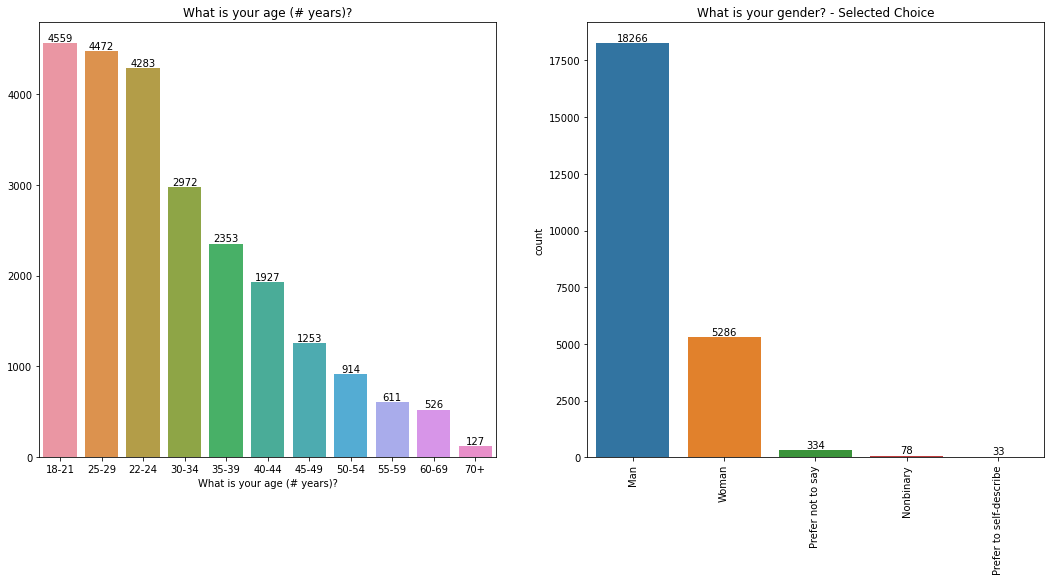

In [27]:

f,(ax1,ax2) = plt.subplots(1,2,figsize=(18,8))
question = ques_no_description_map['Q2']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(x=combined_df[question],order=cat_dict.keys(),ax=ax1)
ax1.set_title(question,fontsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set(ylabel=None)
plt.xticks(rotation=90)

question = ques_no_description_map['Q3']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(combined_df[question],order=cat_dict.keys(),ax=ax2)
ax2.set_title(question,fontsize=12)
ax2.bar_label(ax2.containers[0])
ax2.set(xlabel=None)
plt.show()

- most of the survey participants are within the age bracket of 18-34 net net . 
- the most important thing this plot tells is that age is just a number, 127 participants are above 70. 
- mostly men because only women are only supposed to do cooking and doing other domestic chores along with their regular gig. 

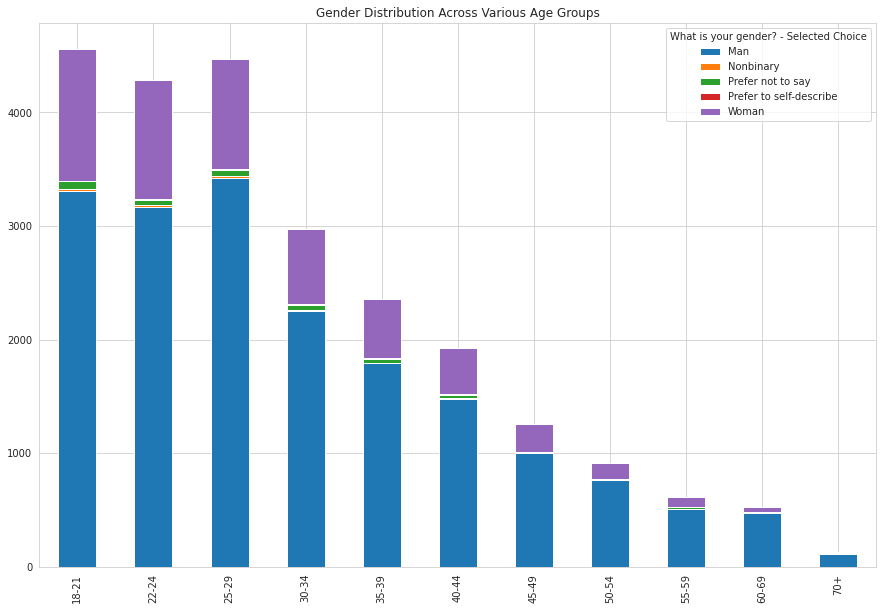

In [21]:
df_plot=combined_df.groupby([ques_no_description_map[single_questons[1]], ques_no_description_map[single_questons[2]]]).size().reset_index().pivot(columns=ques_no_description_map[single_questons[2]], index=ques_no_description_map[single_questons[1]], values=0)

df_plot.plot(kind='bar', stacked=True,figsize=(15,10),title= "Gender Distribution Across Various Age Groups").set(xlabel=None)
plt.show()

#### What can you obseve ?

1. women participants frequency decreases rapidly in comparison to the men as the age bucket increases. 
2. some men are either hustler for life or they don't have any life even after crossing their 60s, just kidding they are definately hustlers.  

## Lets look at the geographic distribution

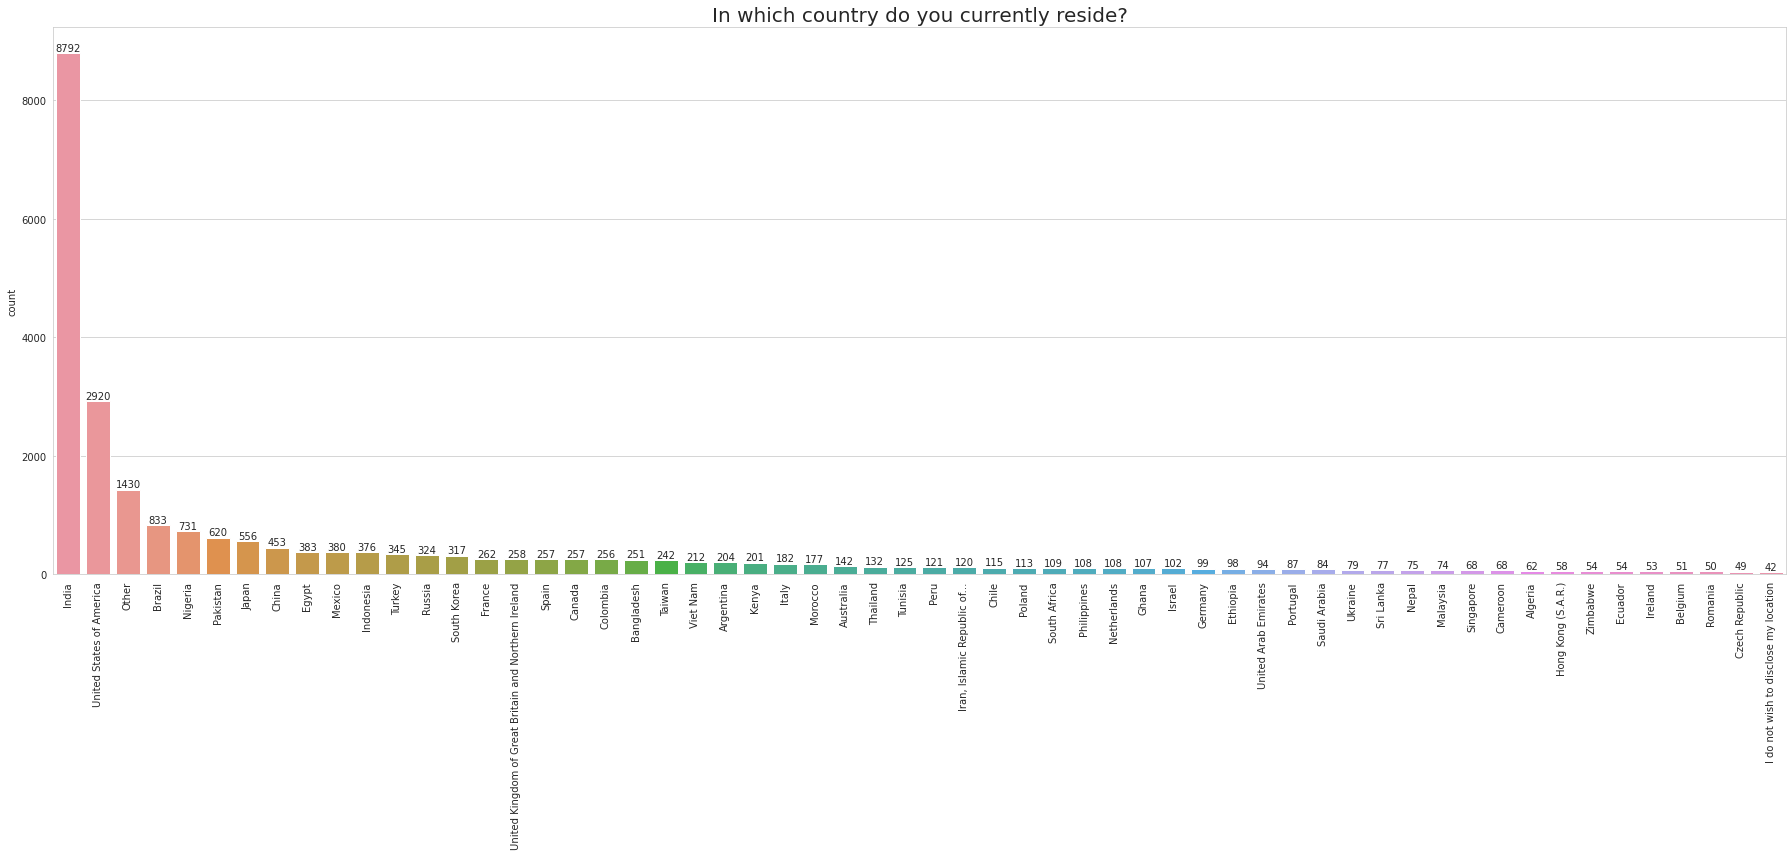

In [22]:
plot_category_seaborn(combined_df,single_questons[3],rotation=True,country=True)

- Indians are killing here as well. 
- Why not afterall we are about to surpass the population of china in few years and will be becoming the most populated country of this world. Moment of proud.  
2 min of silence for those who are actually proud :P

Observation

Top 3 county which participated in this survey

1. India 
2. USA 
3. Brazil 
 



## lets look at the plaform which most participants have used to learn data science and which of them they found them usefull out all the choices.

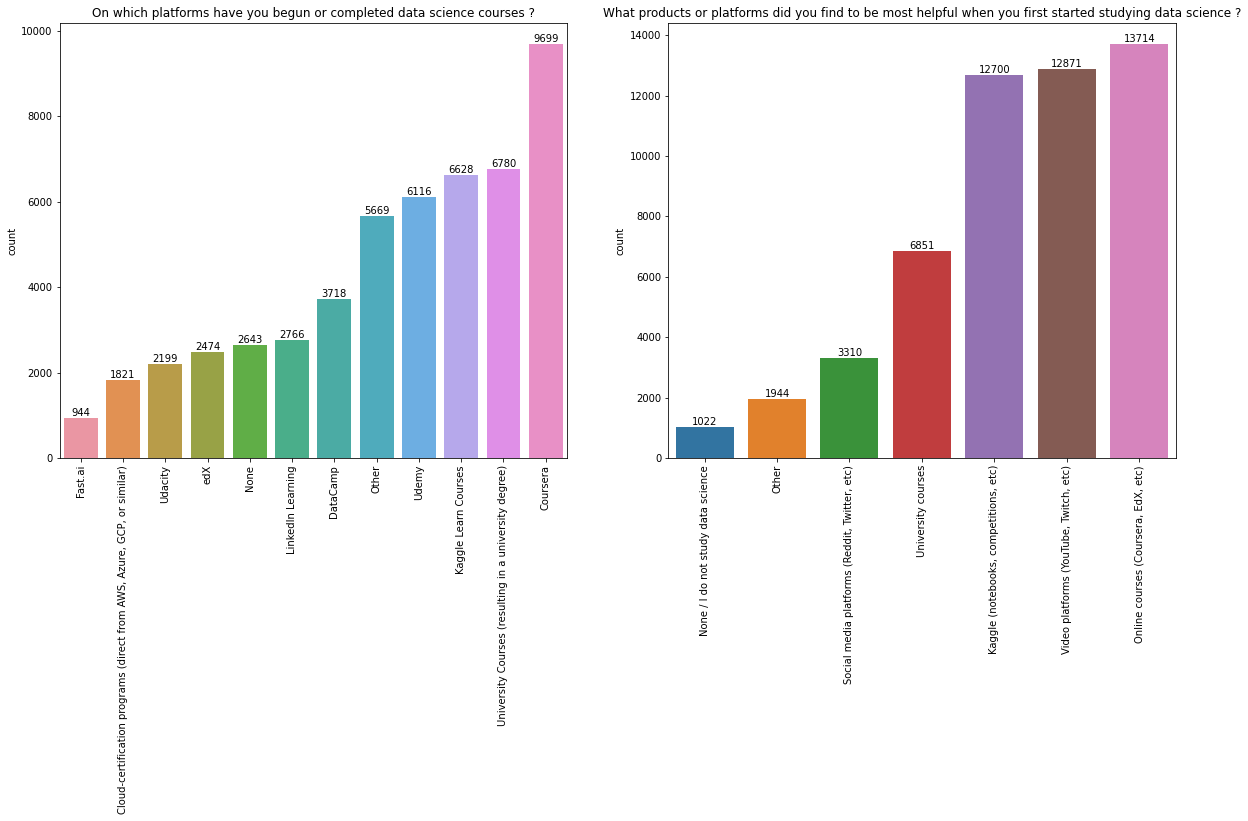

In [48]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
question = ques_no_description_map['Q6']
freq_dict,raw= get_counts(responses,question_to_part_mapping['Q6'])
sns.countplot(x=raw,order=freq_dict.keys(),ax=ax1)
ax1.set_title(question,fontsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set(xlabel=None)
ax1.tick_params('x',rotation=90)

question = ques_no_description_map['Q7']
freq_dict,raw= get_counts(responses,question_to_part_mapping['Q7'])
sns.countplot(x=raw,order=freq_dict.keys(),ax=ax2)
sns.countplot(combined_df[question],order=freq_dict.keys(),ax=ax2)
ax2.set_title(question,fontsize=12)
ax2.bar_label(ax2.containers[0])
ax2.tick_params('x',rotation=90)
ax2.set(xlabel=None)
plt.show()



## Education 

>Now I am looking all the education related responses in this single view.

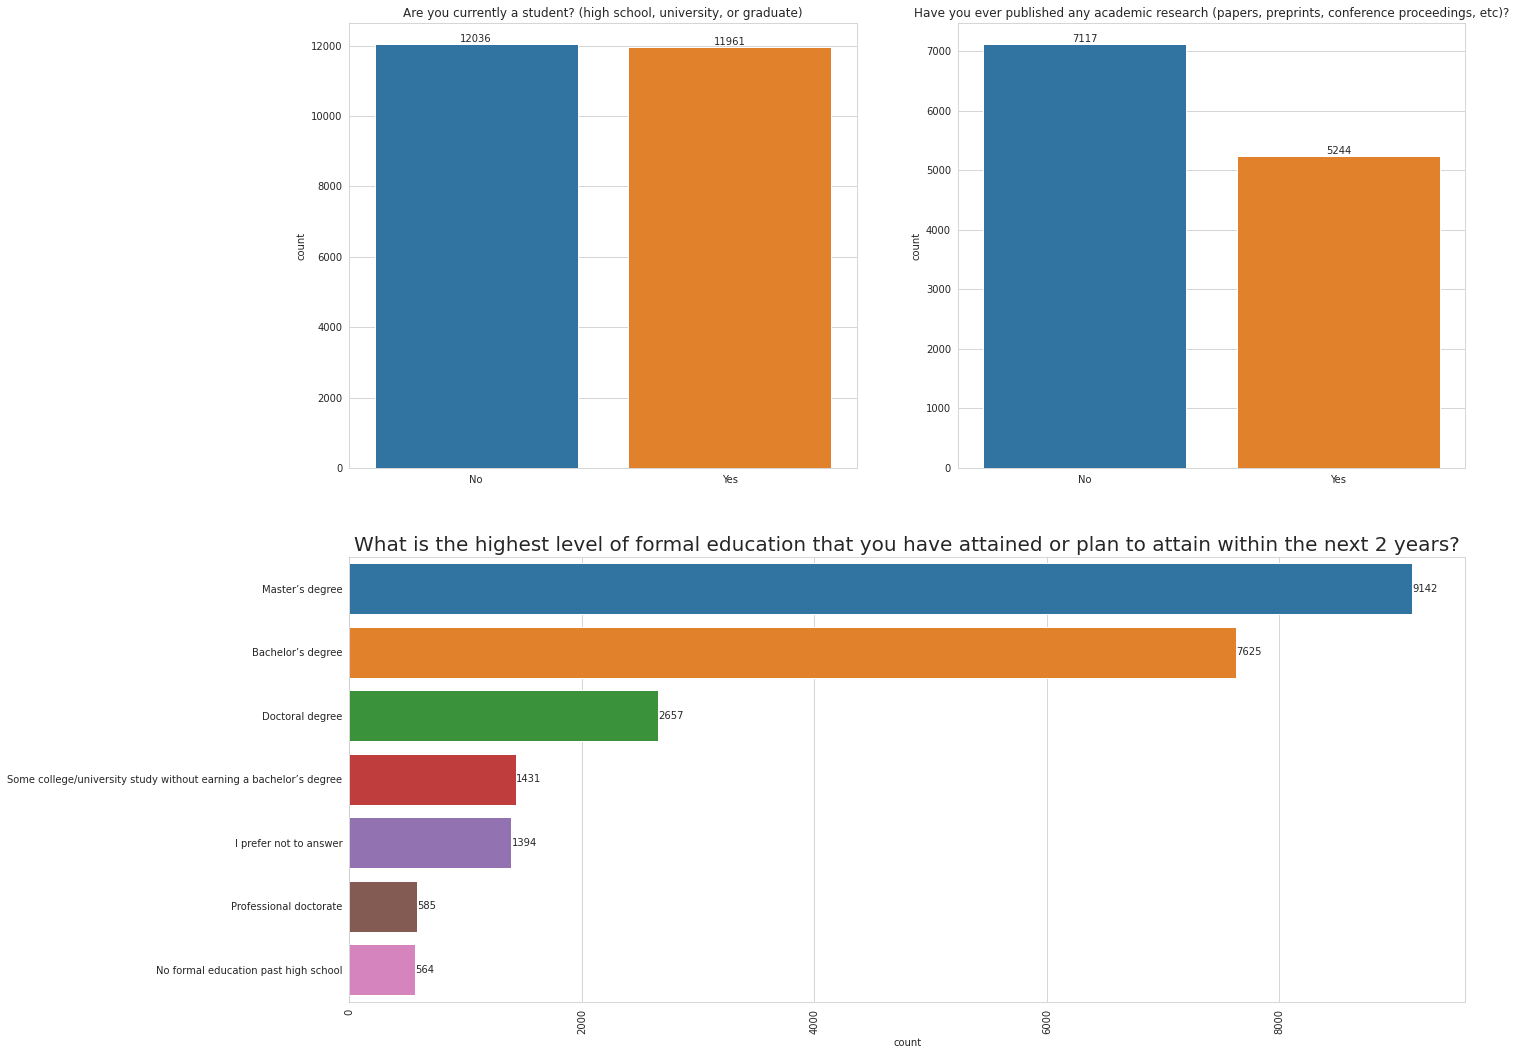

In [23]:
educ_ques = ['Q5','Q8','Q9']
plt.figure(figsize=(20,18))
ax1 = plt.subplot(2,1,2)
question = ques_no_description_map['Q8']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax1)
plt.title(question,fontsize=20)
ax1.bar_label(ax1.containers[0])
ax1.set(ylabel=None)
plt.xticks(rotation=90)

ax2 = plt.subplot(2,2,1)
question = ques_no_description_map['Q5']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(combined_df[question],order=cat_dict.keys(),ax=ax2)
plt.title(question,fontsize=12)
ax2.bar_label(ax2.containers[0])
ax2.set(xlabel=None)
    
ax3 = plt.subplot(2,2,2)
question = ques_no_description_map['Q9']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(combined_df[question],order=cat_dict.keys(),ax=ax3)
plt.title(question,fontsize=12)
ax3.bar_label(ax3.containers[0])
ax3.set(xlabel=None)

plt.show()

## Observations

1. almost half of the participants are students.
2. majority of them haven't published any research paper.
3. alot of them also holds a master's degree or they have a plan of getting it withing next 2 years.



## Industry Related Questions

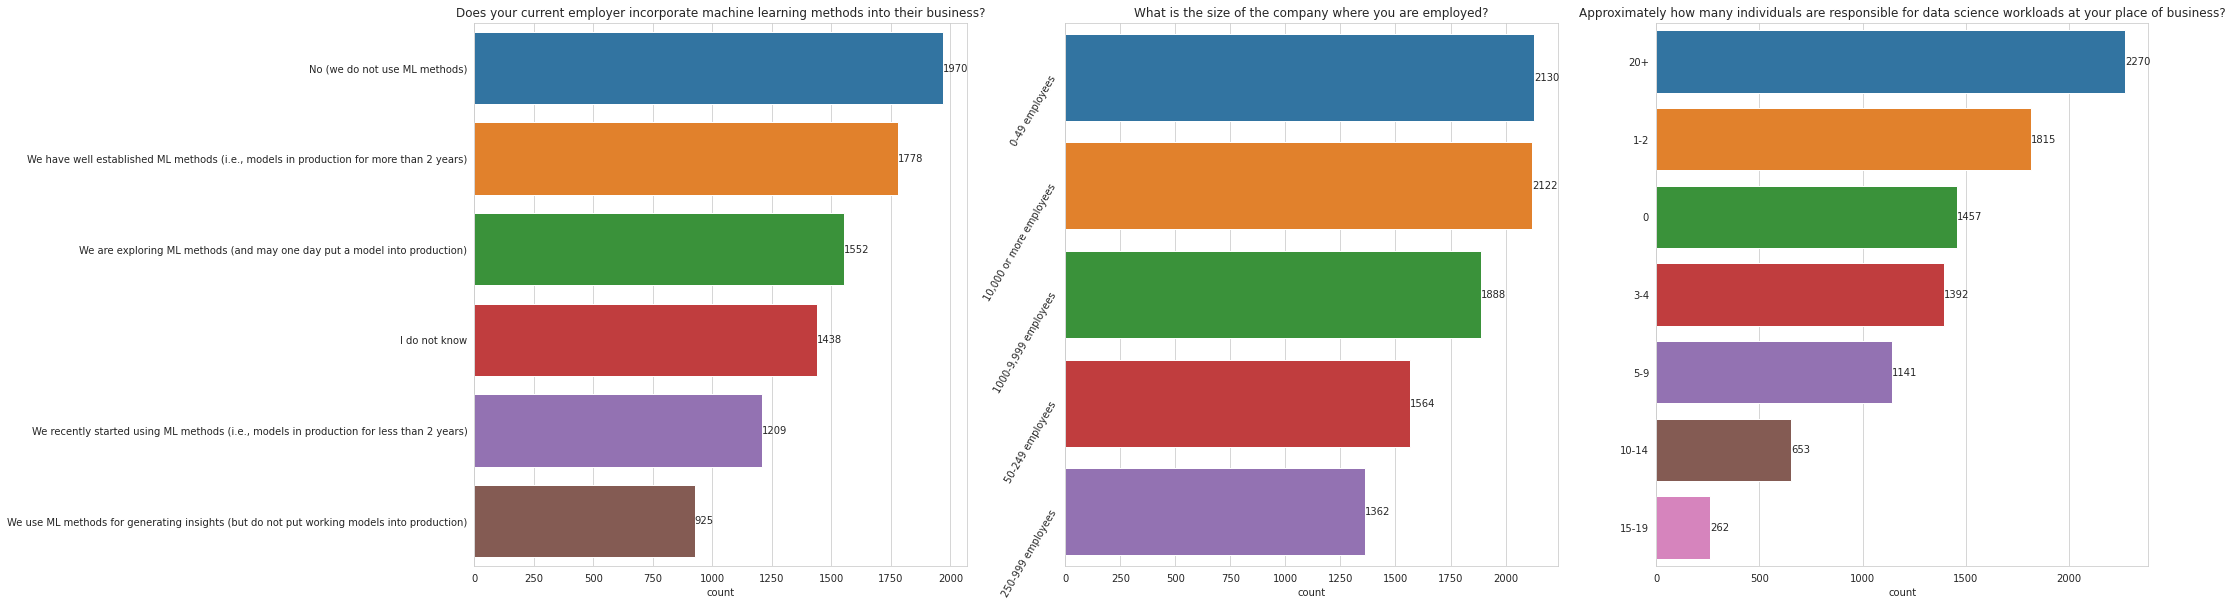

In [46]:

f, (ax1,ax2,ax3)= plt.subplots(1, 3, figsize=(30,10))

question = ques_no_description_map['Q27']
cat_dict=dict(combined_df[question].value_counts())
ax1=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax1)
ax1.set_title(question,fontsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set(ylabel=None)


question = ques_no_description_map['Q25']
cat_dict=dict(combined_df[question].value_counts())
ax2=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax2)
ax2.set_title(question,fontsize=12)
ax2.bar_label(ax2.containers[0])
ax2.set(ylabel=None)
ax2.tick_params('y',rotation=60)

question = ques_no_description_map['Q26']
cat_dict=dict(combined_df[question].value_counts())
ax3=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax3)
ax3.set_title(question,fontsize=12)
ax3.bar_label(ax3.containers[0])
ax3.set(ylabel=None)




plt.show()

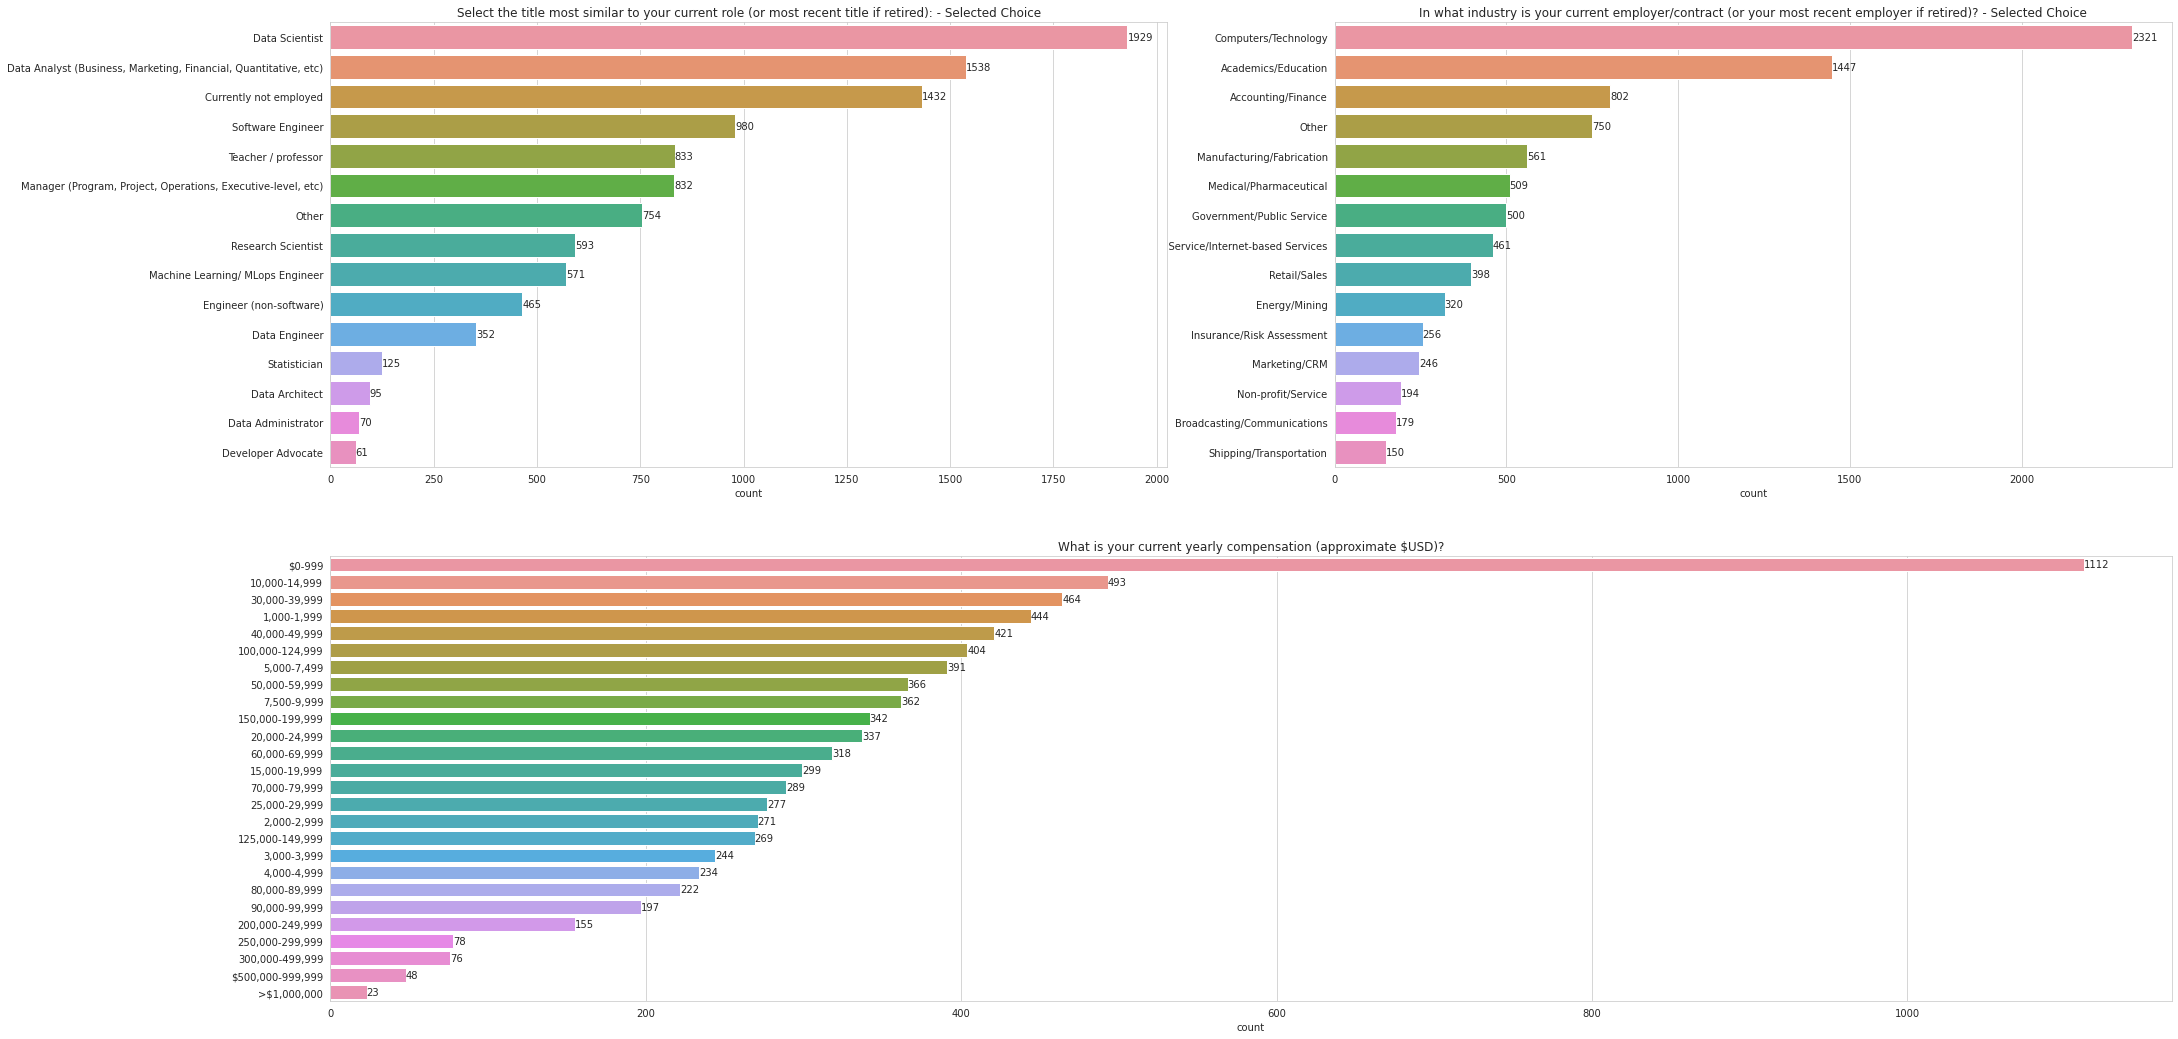

In [25]:

plt.figure(figsize=(33,18))

ax1 = plt.subplot(2,1,2)
question = ques_no_description_map['Q29']
cat_dict=dict(combined_df[question].value_counts())
ax1=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax1)
ax1.set_title(question,fontsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set(ylabel=None)

ax2 = plt.subplot(2,2,2)
question = ques_no_description_map['Q24']
cat_dict=dict(combined_df[question].value_counts())
ax2=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax2)
ax2.set_title(question,fontsize=12)
#ax2.tick_params(rotation=45)
ax2.bar_label(ax2.containers[0])
ax2.set(ylabel=None)

ax3 = plt.subplot(2,2,1)
question = ques_no_description_map['Q23']
cat_dict=dict(combined_df[question].value_counts())
ax3=sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax3)
ax3.set_title(question,fontsize=12)

ax3.bar_label(ax3.containers[0])
ax3.set(ylabel=None)
plt.show()



### lets see if there exist any relation between salary and Degree

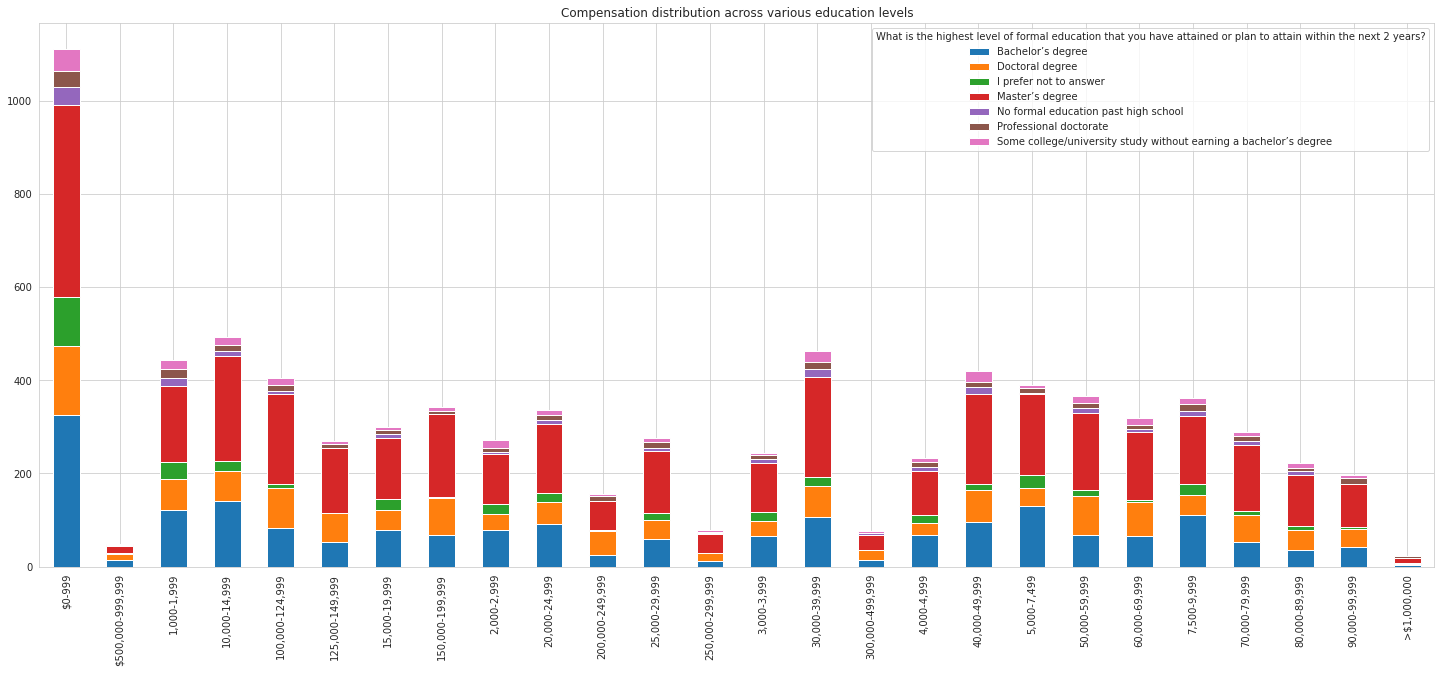

In [26]:
df_compen_edu=combined_df.groupby( [ques_no_description_map['Q29'], ques_no_description_map['Q8']]).size().reset_index().pivot(columns=ques_no_description_map['Q8'], index=ques_no_description_map['Q29'], values=0)

df_compen_edu.plot(kind='bar', stacked=True,figsize=(25,10),title= "Compensation distribution across various education levels",sort_columns=True).set(xlabel=None)
plt.show()

## education and role

In [ ]:

Q1 Duration (in seconds)



Q22 Which of the following ML model hubs/repositories do you use most often? - Selected Choice

Q32 Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice


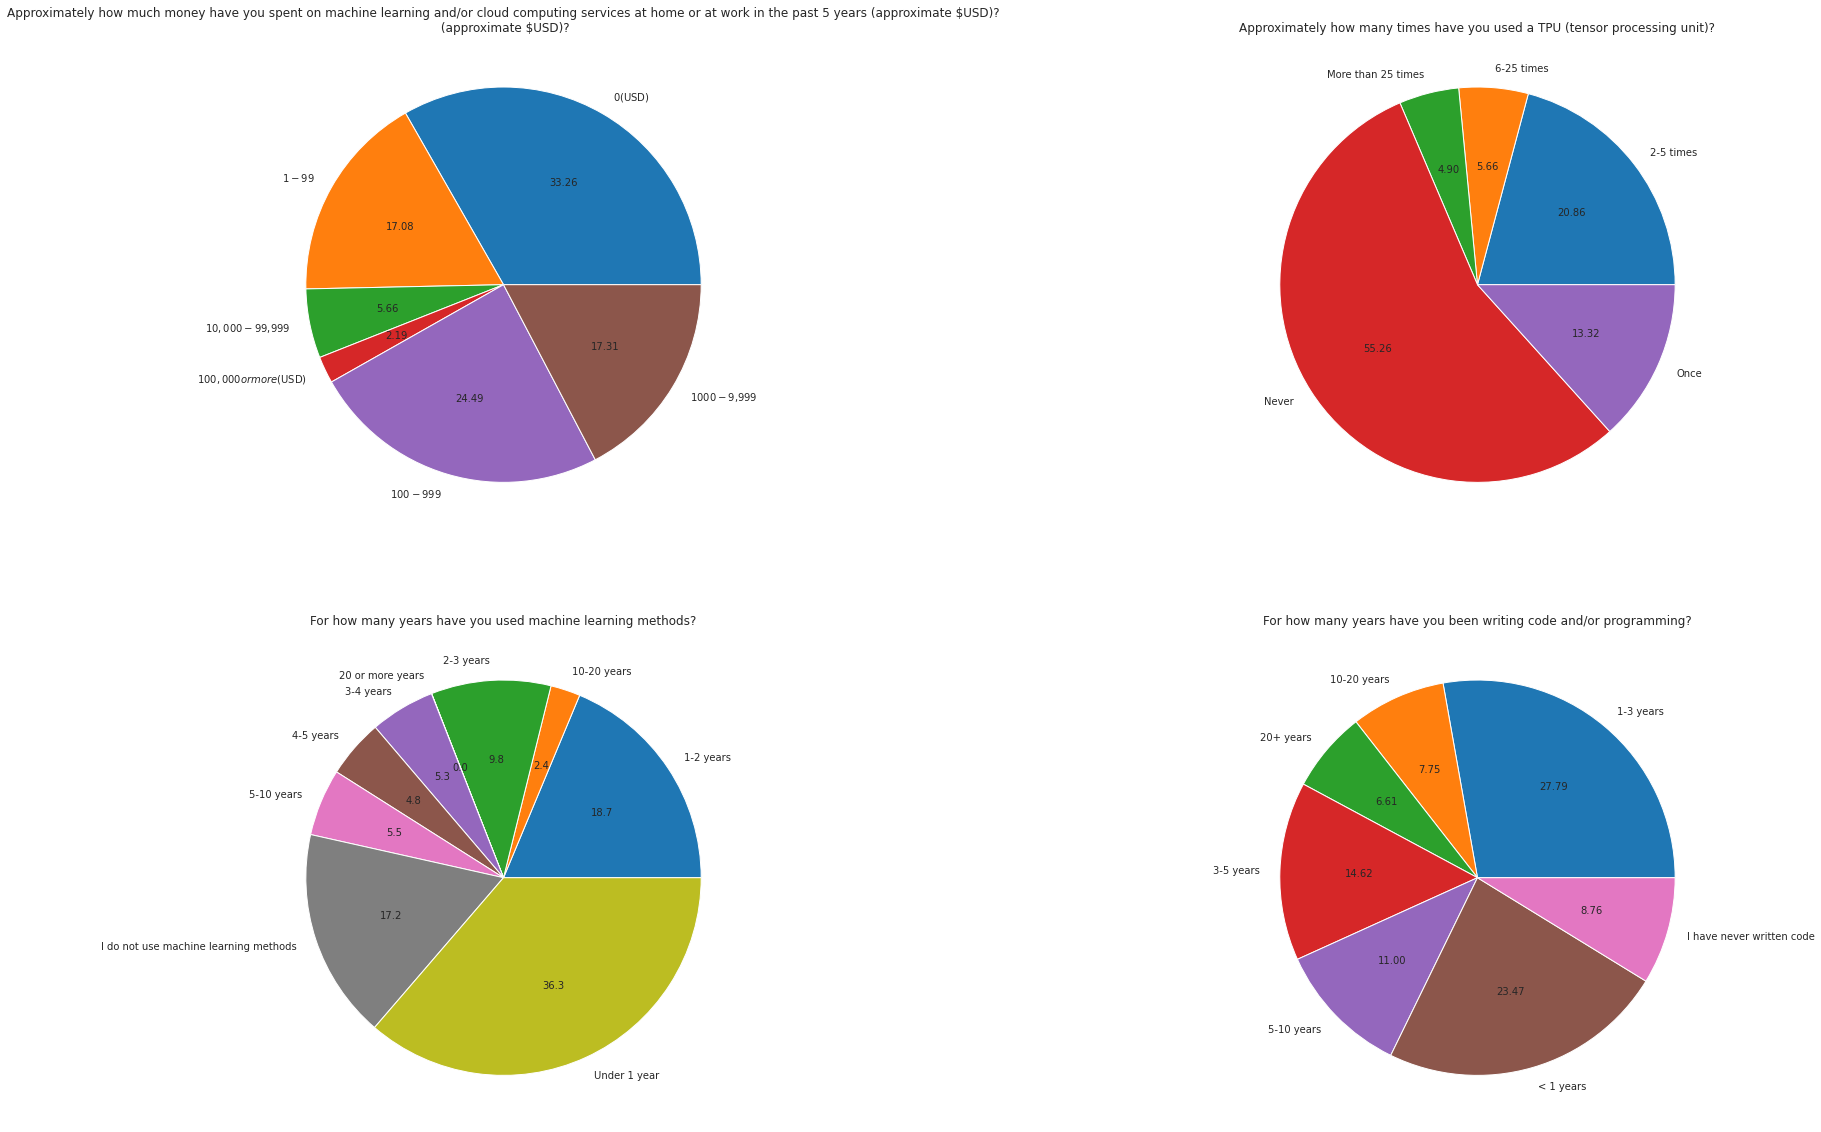

In [27]:
f,((ax1,ax2),(ax3,ax4))= plt.subplots(2, 2, figsize=(32,20))

ax1.pie(combined_df.groupby(ques_no_description_map['Q30']).size(),labels=list(combined_df.groupby(ques_no_description_map['Q30']).size().index), autopct='%.2f')
ax1.set_title(ques_no_description_map['Q30'],fontsize=12)
ax2.pie(combined_df.groupby(ques_no_description_map['Q43']).size(),labels=list(combined_df.groupby(ques_no_description_map['Q43']).size().index), autopct='%.2f')
ax2.set_title(ques_no_description_map['Q43'],fontsize=12)

ax3.pie(combined_df.groupby(ques_no_description_map['Q16']).size(),labels=list(combined_df.groupby(ques_no_description_map['Q16']).size().index), autopct='%.1f')
ax3.set_title(ques_no_description_map['Q16'],fontsize=12)

ax4.pie(combined_df.groupby(ques_no_description_map['Q11']).size(),labels=list(combined_df.groupby(ques_no_description_map['Q11']).size().index), autopct='%.2f')
ax4.set_title(ques_no_description_map['Q11'],fontsize=12)

plt.show()



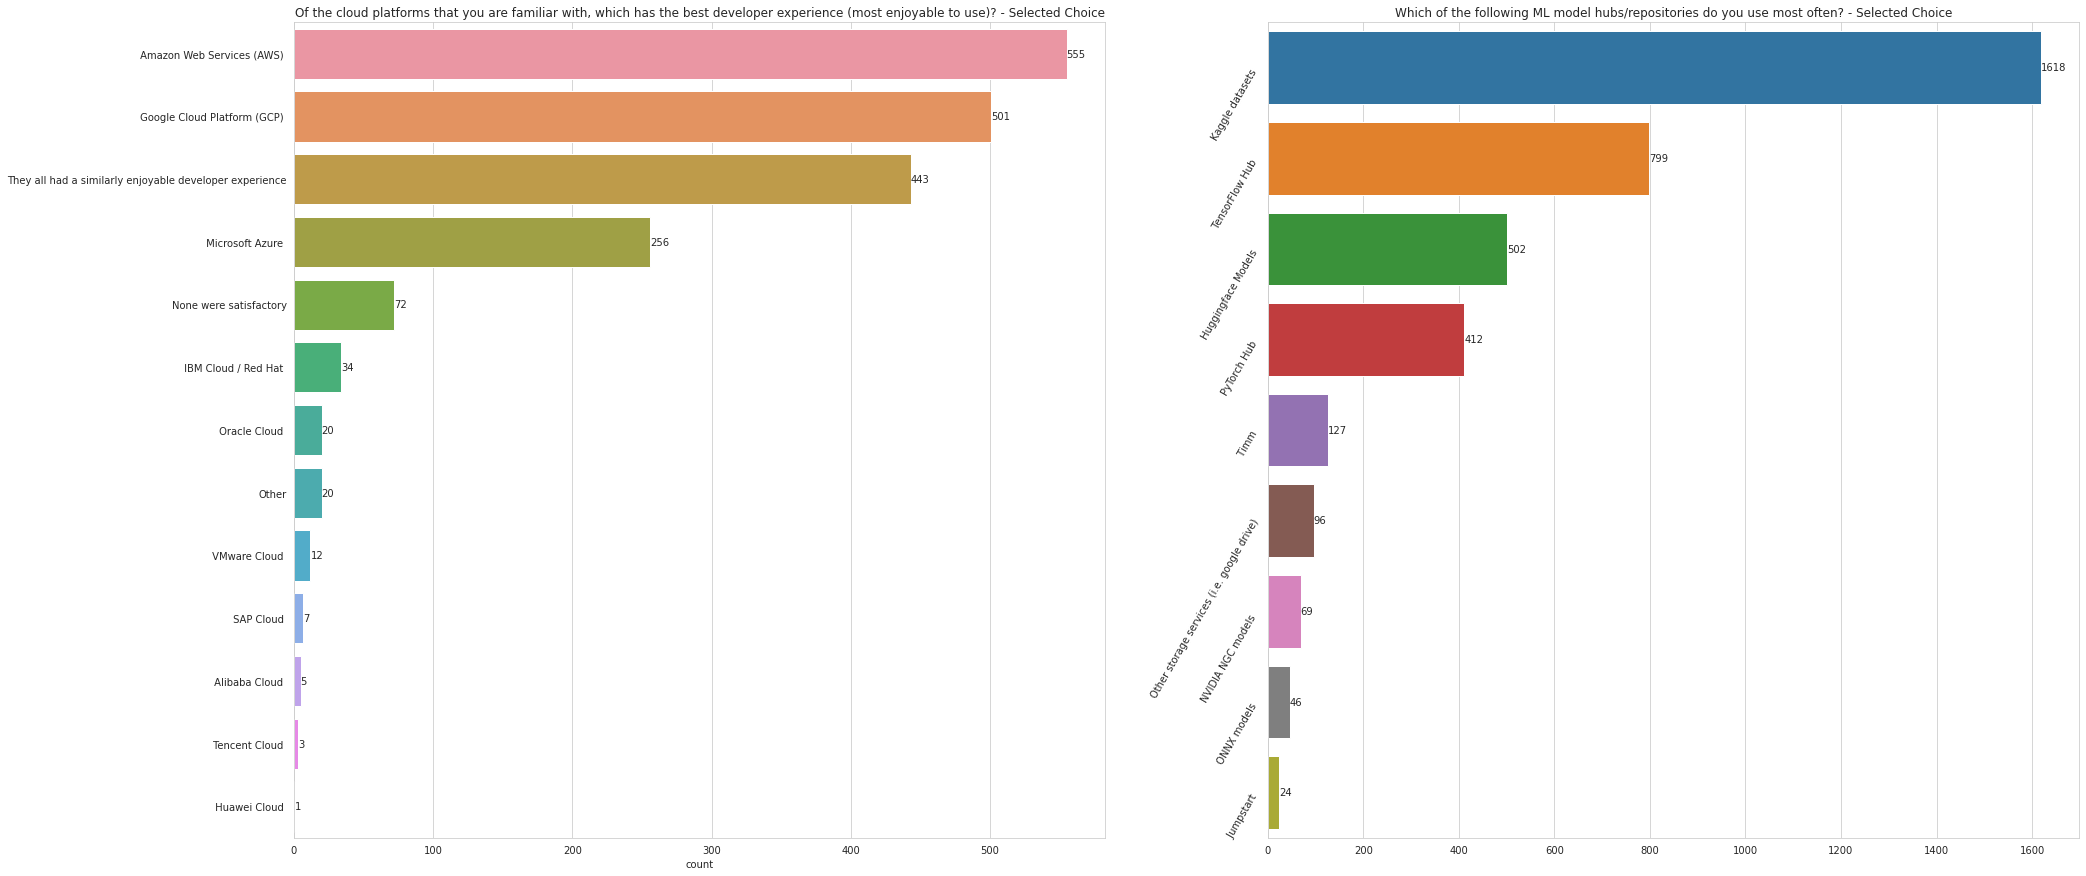

In [44]:
f,(ax1,ax2)= plt.subplots(1, 2, figsize=(32,15))

question = ques_no_description_map['Q32']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax1)
ax1.set_title(question,fontsize=12)
ax1.bar_label(ax1.containers[0])
ax1.set(ylabel=None)


question = ques_no_description_map['Q22']
cat_dict=dict(combined_df[question].value_counts())
sns.countplot(y=combined_df[question],order=cat_dict.keys(),ax=ax2)
ax2.set_title(question,fontsize=12)
ax2.bar_label(ax2.containers[0])
ax2.tick_params('y',rotation=60)
ax2.set(ylabel=None)
ax2.set(xlabel=None)
    


plt.show()

In [111]:
def plot_category_raw(df,ques,title=None,rotation=False,vertical=False):
    question = ques_no_description_map[ques]
    freq_dict,raw_counts= get_counts(df,question_to_part_mapping[ques])
    sns.set_style("whitegrid")
    sns.color_palette('pastel')
    plt.figure(figsize=(15,10))
    if vertical:
        ax=sns.countplot(y=raw_counts,order=freq_dict.keys())
        ax.set(ylabel=None)
    else:
        ax=sns.countplot(x=raw_counts,order=freq_dict.keys())
        ax.set(xlabel=None)
    ax.bar_label(ax.containers[0])
    if title is None :
        plt.title(question,fontsize=12)
    else:
        plt.title(title,fontsize=12)      
    if rotation:
        plt.xticks(rotation=90)
    plt.show()

### Lets look which is the most famous programming language among the respondant

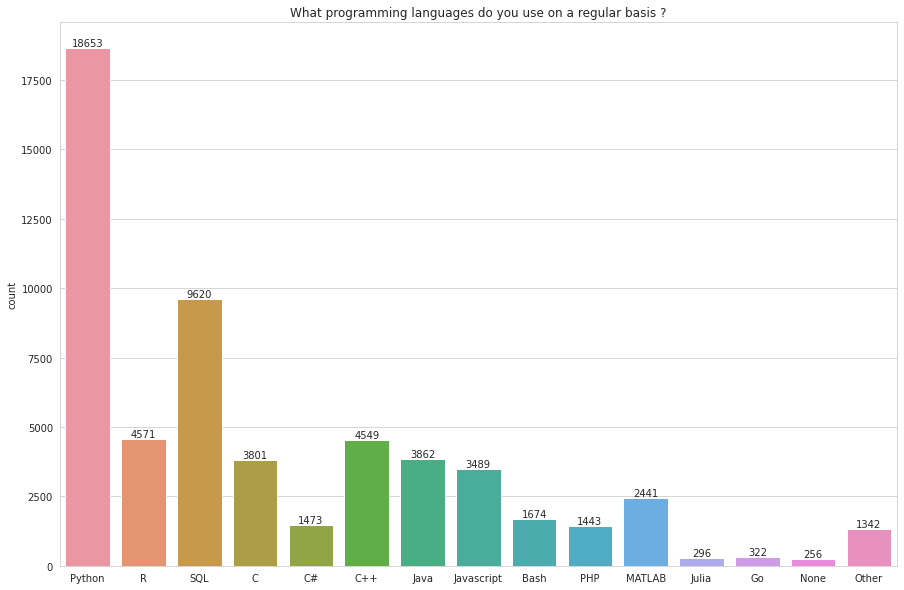

In [112]:
plot_category_raw(responses,'Q12')

- seems like python and SQL are the go to languages.
- R/C++ are the third most used daily languages. 

### which platform is the most helpfull across the population ?

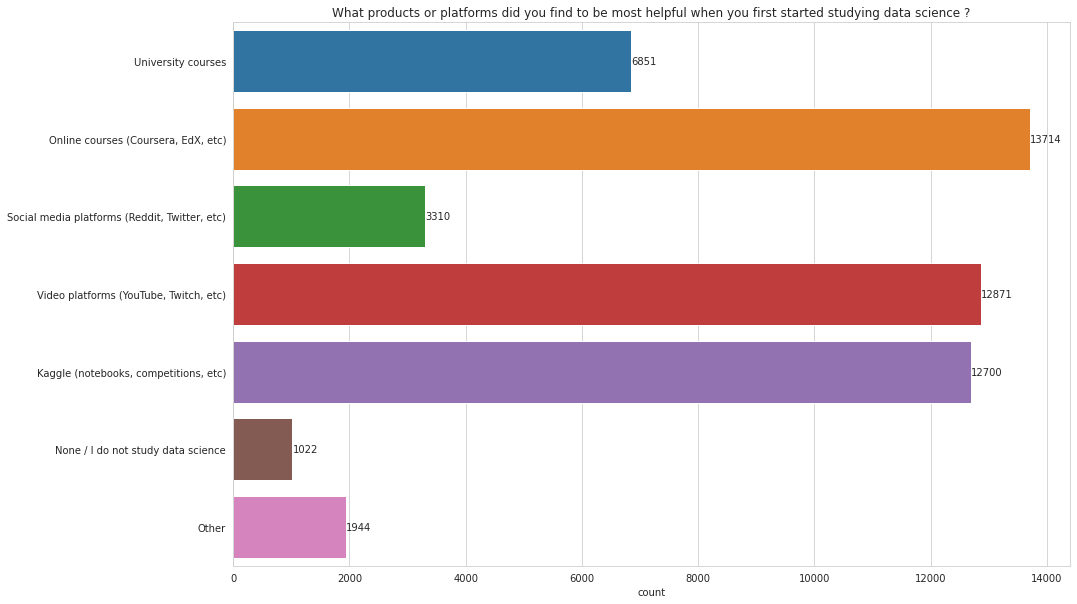

In [114]:
plot_category_raw(responses,'Q7',vertical=True)

In [ ]:

plt.bar(ind, list(data.values()))
plt.xticks(ind, list(data.keys()))
plt.show()

In [94]:

get_counts(responses,question_to_part_mapping['Q35'])

{'MySQL': 2233,
 'PostgreSQL': 1516,
 'SQLite': 1159,
 'Oracle Database': 688,
 'MongoDB': 1031,
 'Snowflake': 399,
 'IBM Db2': 192,
 'Microsoft SQL Server': 1203,
 'Microsoft Azure SQL Database': 520,
 'Amazon Redshift': 380,
 'Amazon RDS': 505,
 'Amazon DynamoDB': 356,
 'Google Cloud BigQuery': 690,
 'Google Cloud SQL': 439,
 'None': 955,
 'Other': 217}

Q6 On which platforms have you begun or completed data science courses ?
Q7 What products or platforms did you find to be most helpful when you first started studying data science ?
Q10 Did your research make use of machine learning ?
Q12 What programming languages do you use on a regular basis ?
Q13 Which of the following integrated development environments (IDE's) do you use on a regular basis ?
Q14 Do you use any of the following hosted notebook products ?
Q15 Do you use any of the following data visualization libraries on a regular basis ?
Q17 Which of the following machine learning frameworks do you use on a regular basis ?
Q18 Which of the following ML algorithms do you use on a regular basis ?
Q19 Which categories of computer vision methods do you use on a regular basis ?
Q20 Which of the following natural language processing (NLP) methods do you use on a regular basis ?
Q21 Do you download pre-trained model weights from any of the following services ?
Q28 Select any activities that make up an important part of your role at work: (Select all that apply) - Analyze and understand data to influence product or business decisions ?
Q31 Which of the following cloud computing platforms do you use ?
Q33 Do you use any of the following cloud computing products ?
Q34 Do you use any of the following data storage products ?
Q35 Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar) ?
Q36 Do you use any of the following business intelligence tools ? 
Q37 Do you use any of the following managed machine learning products on a regular basis ?
Q38 Do you use any of the following automated machine learning tools ?
Q39 Do you use any of the following products to serve your machine learning models ?
Q40 Do you use any tools to help monitor your machine learning models and/or experiments ?
Q41 Do you use any of the following responsible or ethical AI products in your machine learning practices ?
Q42 Do you use any of the following types of specialized hardware when training machine learning models ?
Q44 Who/what are your favorite media sources that report on data science topics ?

In [73]:
responses.iloc[1]['Q6_1']

nan